In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy
import statsmodels
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix , classification_report ,roc_curve,auc,roc_auc_score ,mean_squared_error

import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)

In [2]:
data= pd.read_csv("Hotel Reservations.csv")

In [3]:
data.shape

(36275, 19)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [6]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
data.drop(['Booking_ID'],axis=1,inplace=True)

In [8]:
le=LabelEncoder()
data["type_of_meal_plan"]=le.fit_transform(data["type_of_meal_plan"])
data["room_type_reserved"]=le.fit_transform(data["room_type_reserved"])
data["market_segment_type"]=le.fit_transform(data["market_segment_type"])
data["booking_status"]=le.fit_transform(data["booking_status"])

In [9]:
data['no_of_adults']=data['no_of_adults'].astype("O")
data['no_of_children']=data['no_of_children'].astype("O")
data['no_of_weekend_nights']=data['no_of_weekend_nights'].astype("O")                                                               
data['required_car_parking_space']=data['required_car_parking_space'].astype("O")
data['arrival_year']=data['arrival_year'].astype("O")
data['repeated_guest']=data['repeated_guest'].astype("O")
data['no_of_previous_cancellations']=data['no_of_previous_cancellations'].astype("O")
data['no_of_previous_bookings_not_canceled']=data['no_of_previous_bookings_not_canceled'].astype("O")
data['no_of_special_requests']=data['no_of_special_requests'].astype("O")
data['no_of_week_nights']=data['no_of_week_nights'].astype("O")
data["type_of_meal_plan"]=data["type_of_meal_plan"].astype("O")
data["room_type_reserved"]=data["room_type_reserved"].astype("O")
data["market_segment_type"]=data["market_segment_type"].astype("O")
data["booking_status"]=data["booking_status"].astype("O")

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  object 
 1   no_of_children                        36275 non-null  object 
 2   no_of_weekend_nights                  36275 non-null  object 
 3   no_of_week_nights                     36275 non-null  object 
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  object 
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  object 
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [11]:
data.describe()

,lead_time,arrival_month,arrival_date,avg_price_per_room
count,36275.000000,36275.000000,36275.000000,36275.000000
mean,85.232557,7.423653,15.596995,103.423539
std,85.930817,3.069894,8.740447,35.089424
min,0.000000,1.000000,1.000000,0.000000
25%,17.000000,5.000000,8.000000,80.300000
50%,57.000000,8.000000,16.000000,99.450000
75%,126.000000,10.000000,23.000000,120.000000
max,443.000000,12.000000,31.000000,540.000000


In [12]:
data_numeric=data.select_dtypes(include=np.number)
data_numeric

,lead_time,arrival_month,arrival_date,avg_price_per_room
0,224,10,2,65.00
1,5,11,6,106.68
2,1,2,28,60.00
3,211,5,20,100.00
4,48,4,11,94.50
...,...,...,...,...
36270,85,8,3,167.80
36271,228,10,17,90.95
36272,148,7,1,98.39
36273,63,4,21,94.50


In [13]:
data_numeric.columns

Index(['lead_time', 'arrival_month', 'arrival_date', 'avg_price_per_room'], dtype='object')

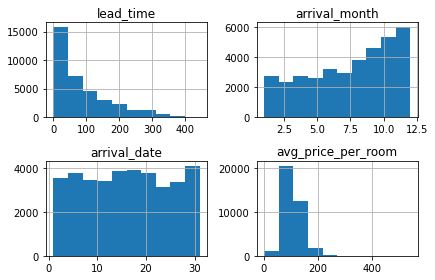

In [17]:
data_numeric.hist()
plt.tight_layout()
plt.show()

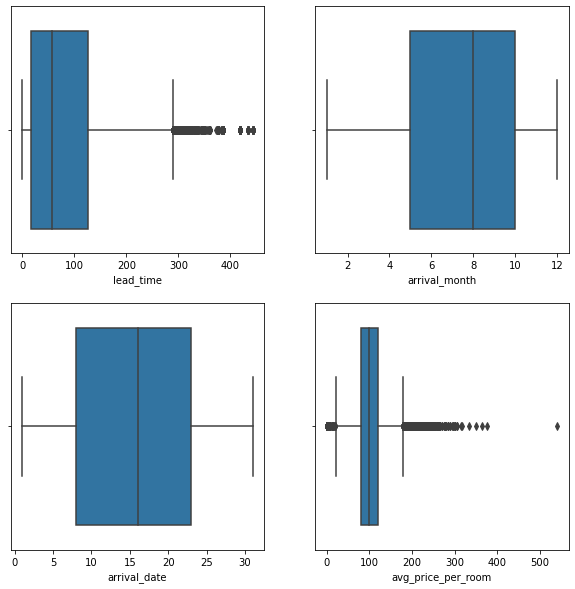

In [19]:
fig, ax = plt.subplots(2,2,figsize=(10,10));
sns.boxplot(x=data['lead_time'],ax=ax[0,0]);
sns.boxplot(x=data['arrival_month'],ax=ax[0,1]);
sns.boxplot(x=data['arrival_date'],ax=ax[1,0]);
sns.boxplot(x=data['avg_price_per_room'],ax=ax[1,1]);

In [20]:
Q1= data.lead_time.quantile(0.25)
Q3= data.lead_time.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

dfdia_outliers = data.lead_time[(data.lead_time < lower) | (data.lead_time > upper)]
len(data.lead_time[data.lead_time> upper])

1331

In [22]:
data.lead_time= np.where(data.lead_time>upper,upper,data.lead_time)

In [24]:
Q1= data.avg_price_per_room.quantile(0.25)
Q3= data.avg_price_per_room.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

outliers = data.avg_price_per_room [(data.avg_price_per_room < lower) | (data.avg_price_per_room  > upper)]
len(data.avg_price_per_room [data.avg_price_per_room > upper])

1069

In [25]:
data.avg_price_per_room = np.where(data.avg_price_per_room >upper,upper,data.avg_price_per_room )
data.avg_price_per_room = np.where(data.avg_price_per_room <lower,lower,data.avg_price_per_room )

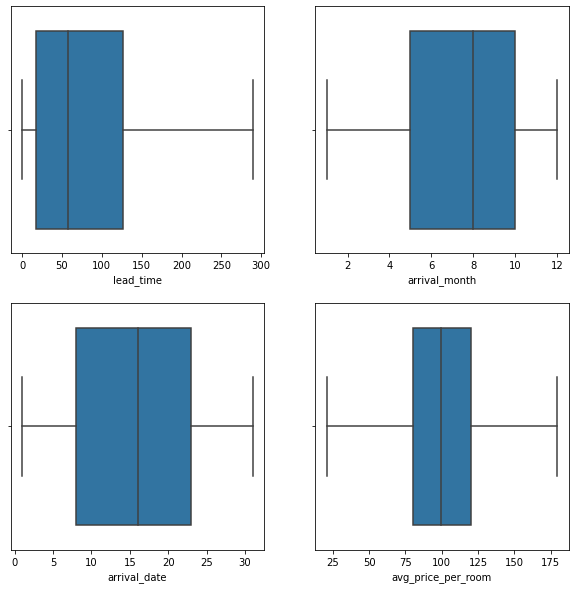

In [27]:
fig, ax = plt.subplots(2,2,figsize=(10,10));
sns.boxplot(x=data['lead_time'],ax=ax[0,0]);
sns.boxplot(x=data['arrival_month'],ax=ax[0,1]);
sns.boxplot(x=data['arrival_date'],ax=ax[1,0]);
sns.boxplot(x=data['avg_price_per_room'],ax=ax[1,1]);

# statical test for continous data

In [28]:
data['booking_status']=data['booking_status'].astype("int")

In [29]:
model = ols('booking_status~lead_time',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
lead_time,1.0,1559.7414,1559.7414,8797.0504,0.0
Residual,36273.0,6431.3034,0.1773,NaN,NaN


In [30]:
model = ols('booking_status~arrival_month',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
arrival_month,1.0,1.0083,1.0083,4.5776,0.0324
Residual,36273.0,7990.0365,0.2203,NaN,NaN


In [31]:
model = ols('booking_status~arrival_date',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
arrival_date,1.0,0.9028,0.9028,4.0985,0.0429
Residual,36273.0,7990.1420,0.2203,NaN,NaN


In [32]:
model = ols('booking_status~avg_price_per_room',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
avg_price_per_room,1.0,163.9652,163.9652,759.8632,0.0
Residual,36273.0,7827.0796,0.2158,NaN,NaN


In [33]:
data['booking_status']=data['booking_status'].astype("object")

# multicolinearity

In [34]:
x=data.iloc[:,[7,9,10,15]]
x['intersept']=1
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns

In [35]:
vif_data["VIF"]=[variance_inflation_factor(x.values,i)
                    for i in range(len(x.columns))]
print(vif_data)

              feature        VIF
0           lead_time   1.023685
1       arrival_month   1.025002
2        arrival_date   1.002225
3  avg_price_per_room   1.008914
4           intersept  20.762076


<AxesSubplot:>

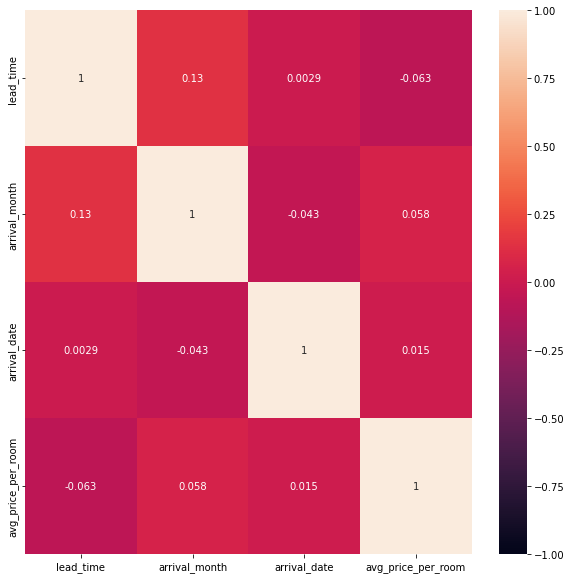

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, vmin= -1, vmax=1)

In [37]:
data.corr()

,lead_time,arrival_month,arrival_date,avg_price_per_room
lead_time,1.000000,0.134083,0.002899,-0.063217
arrival_month,0.134083,1.000000,-0.042780,0.058202
arrival_date,0.002899,-0.042780,1.000000,0.014522
avg_price_per_room,-0.063217,0.058202,0.014522,1.000000


# visulazation for categorical data

In [38]:
data.describe(include=object)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_year,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status
count,36275,36275,36275,36275,36275,36275,36275,36275,36275,36275,36275,36275,36275,36275
unique,5,6,8,18,4,2,7,2,5,2,9,59,6,2
top,2,0,0,2,0,0,0,2018,4,0,0,0,0,1
freq,26108,33577,16872,11444,27835,35151,28130,29761,23214,35345,35937,35463,19777,24390


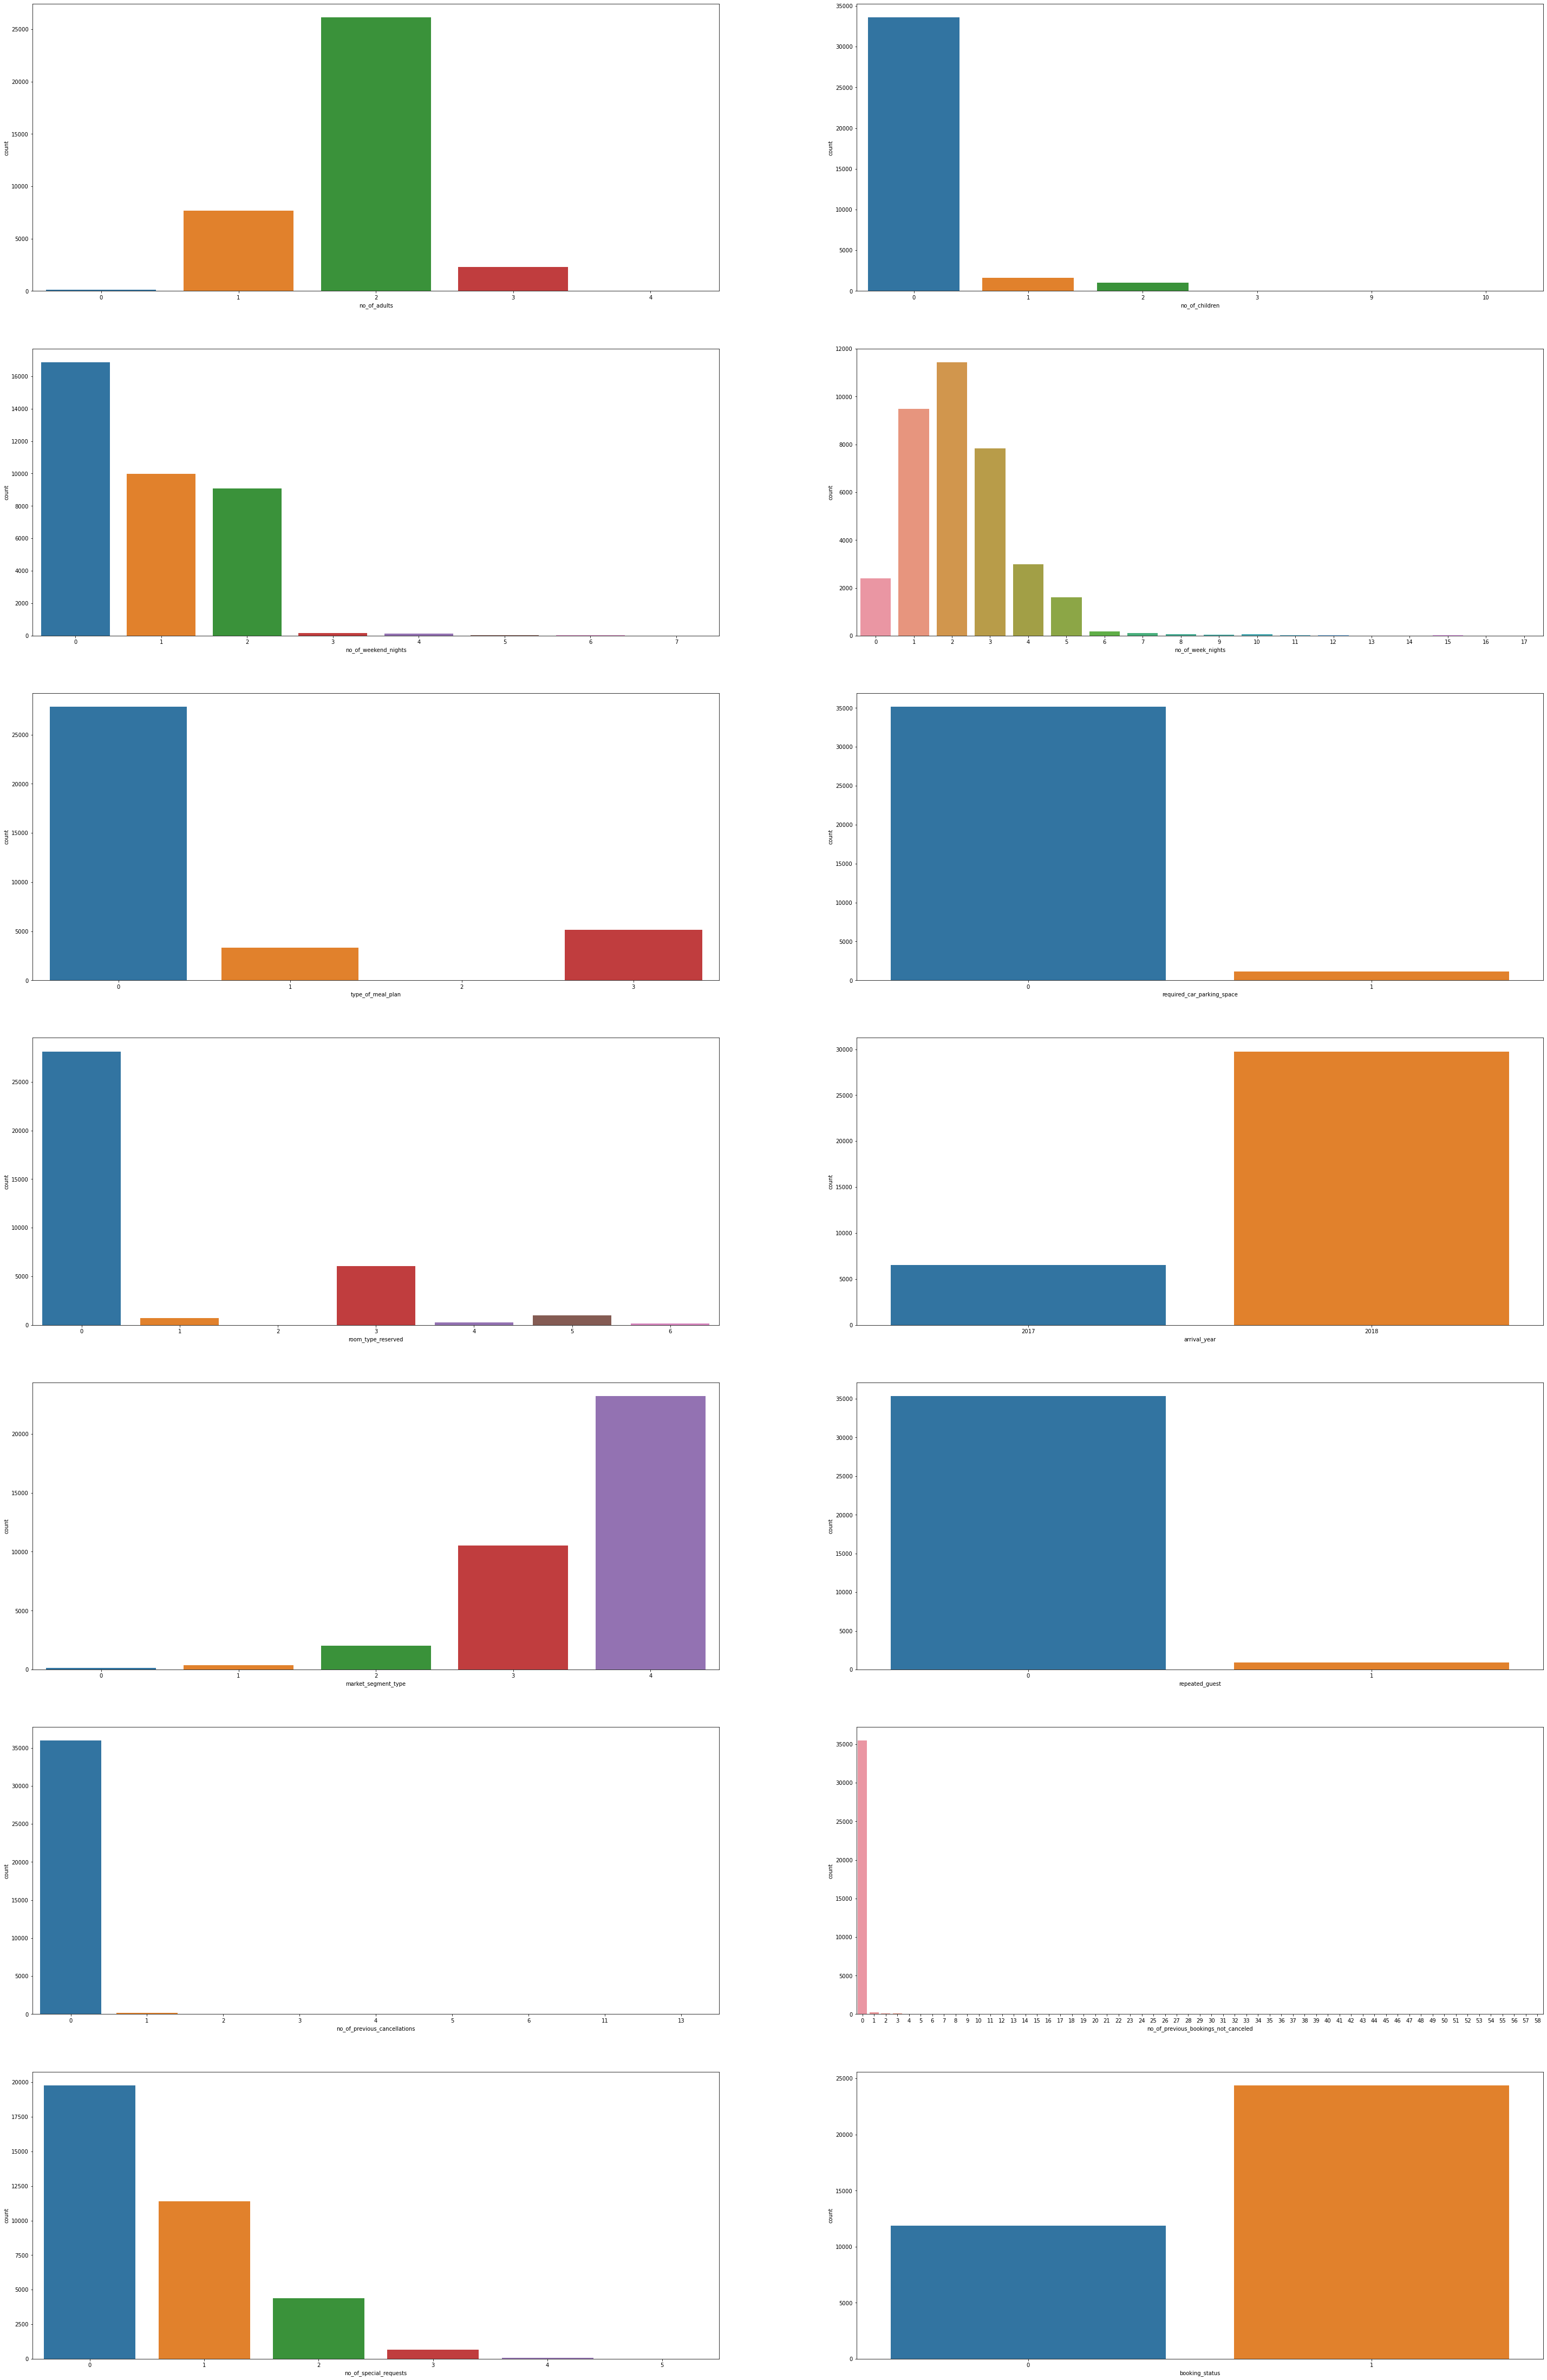

In [41]:
categorical=[]
for column in data:
      if is_string_dtype(data[column]):
        categorical.append(column)      
fig,ax=plt.subplots(nrows=7,ncols=2,figsize=(50,80))
for variable,subplot in zip(categorical,ax.flatten()):
    sns.countplot(data[variable],ax=subplot)
    
plt.show()

In [42]:
categorical

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'arrival_year',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'no_of_special_requests',
 'booking_status']

# statitical test for categorical data

In [51]:
no_of_adults=pd.crosstab(data.booking_status ,data.no_of_adults , margins = True)
scipy.stats.chi2_contingency( no_of_adults ,correction= False )[1]

7.926719613649621e-67

In [52]:
no_of_children=pd.crosstab(data.booking_status ,data.no_of_children , margins = True)
scipy.stats.chi2_contingency( no_of_children ,correction= False )[1]

1.4342589803688548e-07

In [53]:
no_of_weekend_nights=pd.crosstab(data.booking_status ,data.no_of_weekend_nights , margins = True)
scipy.stats.chi2_contingency(no_of_weekend_nights ,correction= False )[1]

9.03804329065824e-38

In [54]:
no_of_week_nights=pd.crosstab(data.booking_status ,data.no_of_week_nights , margins = True)
scipy.stats.chi2_contingency( no_of_week_nights ,correction= False )[1]

7.215985295538555e-70

In [55]:
type_of_meal_plan=pd.crosstab(data.booking_status ,data.type_of_meal_plan , margins = True)
scipy.stats.chi2_contingency(type_of_meal_plan ,correction= False )[1]

1.7009804891209094e-55

In [56]:
required_car_parking_space=pd.crosstab(data.booking_status ,data.required_car_parking_space , margins = True)
scipy.stats.chi2_contingency( required_car_parking_space ,correction= False )[1]

4.1971205853739484e-57

In [57]:
room_type_reserved=pd.crosstab(data.booking_status ,data.room_type_reserved , margins = True)
scipy.stats.chi2_contingency( room_type_reserved ,correction= False )[1]

3.422130308891275e-07

In [58]:
arrival_year=pd.crosstab(data.booking_status ,data.arrival_year , margins = True)
scipy.stats.chi2_contingency( arrival_year ,correction= False )[1]

7.699159060068839e-252

In [59]:
market_segment_type=pd.crosstab(data.booking_status ,data.market_segment_type , margins = True)
scipy.stats.chi2_contingency(market_segment_type,correction= False )[1]

1.910657911754281e-168

In [60]:
repeated_guest=pd.crosstab(data.booking_status ,data.repeated_guest , margins = True)
scipy.stats.chi2_contingency( repeated_guest ,correction= False )[1]

4.507765662410317e-89

In [61]:
no_of_previous_cancellations=pd.crosstab(data.booking_status ,data.no_of_previous_cancellations, margins = True)
scipy.stats.chi2_contingency( no_of_previous_cancellations ,correction= False )[1]

8.806607096123265e-21

In [62]:
no_of_previous_bookings_not_canceled=pd.crosstab(data.booking_status ,data.no_of_previous_bookings_not_canceled , margins = True)
scipy.stats.chi2_contingency( no_of_previous_bookings_not_canceled ,correction= False )[1]

6.0111448803761715e-30

In [63]:
no_of_special_requests=pd.crosstab(data.booking_status ,data.no_of_special_requests , margins = True)
scipy.stats.chi2_contingency(no_of_special_requests ,correction= False )[1]

0.0

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  object 
 1   no_of_children                        36275 non-null  object 
 2   no_of_weekend_nights                  36275 non-null  object 
 3   no_of_week_nights                     36275 non-null  object 
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  object 
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  object 
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [65]:
data.booking_status.value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

In [66]:
data['no_of_adults']=data['no_of_adults'].astype("int")
data['no_of_children']=data['no_of_children'].astype("int")
data['no_of_weekend_nights']=data['no_of_weekend_nights'].astype("int")                                                               
data['required_car_parking_space']=data['required_car_parking_space'].astype("int")
data['arrival_year']=data['arrival_year'].astype("int")
data['repeated_guest']=data['repeated_guest'].astype("int")
data['no_of_previous_cancellations']=data['no_of_previous_cancellations'].astype("int")
data['no_of_previous_bookings_not_canceled']=data['no_of_previous_bookings_not_canceled'].astype("int")
data['no_of_special_requests']=data['no_of_special_requests'].astype("int")
data['no_of_week_nights']=data['no_of_week_nights'].astype("int")
data["type_of_meal_plan"]=data["type_of_meal_plan"].astype("int")
data["room_type_reserved"]=data["room_type_reserved"].astype("int")
data["market_segment_type"]=data["market_segment_type"].astype("int")
data["booking_status"]=data["booking_status"].astype("int")

# model building using solver"liblinear"

In [67]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [68]:
x=data[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']]
y=data['booking_status']

In [69]:
model1=LogisticRegression(solver="liblinear",random_state=0)
model1    

LogisticRegression(random_state=0, solver='liblinear')

In [70]:
model1.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [73]:
y_pred=model1.predict(x)

In [76]:
confusion_matrix(y,y_pred)

array([[ 7203,  4682],
       [ 2564, 21826]], dtype=int64)

In [77]:
model1.score(x,y)

0.8002481047553411

In [78]:
#classification report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.61      0.67     11885
           1       0.82      0.89      0.86     24390

    accuracy                           0.80     36275
   macro avg       0.78      0.75      0.76     36275
weighted avg       0.80      0.80      0.79     36275



In [79]:
# roc curve
y_pred_prob=model1.predict_proba(x)
y_pred_prob

array([[0.56309432, 0.43690568],
       [0.12330879, 0.87669121],
       [0.17782291, 0.82217709],
       ...,
       [0.20777508, 0.79222492],
       [0.53855805, 0.46144195],
       [0.88504168, 0.11495832]])

In [80]:
fpr,tpr,threshold=roc_curve(data["booking_status"],y_pred_prob[:,1])

In [81]:
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.8523615390970906


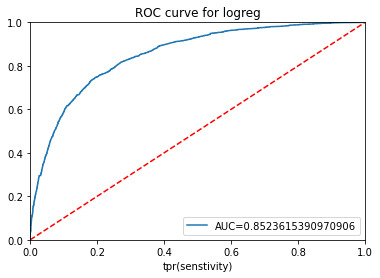

In [82]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr,tpr,label="AUC="+str(roc_auc))
plt.legend(loc=4)
plt.show()

# model 2 using solver"lbfgs"

In [83]:
model2=LogisticRegression(solver="lbfgs",random_state=0)
model2   

LogisticRegression(random_state=0)

In [84]:
model2.fit(x,y)

LogisticRegression(random_state=0)

In [87]:
y_pred=model2.predict(x)

In [90]:
confusion_matrix(y,y_pred)

array([[ 6954,  4931],
       [ 2704, 21686]], dtype=int64)

In [91]:
model2.score(x,y)

0.7895244658855961

In [92]:
#classification report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.59      0.65     11885
           1       0.81      0.89      0.85     24390

    accuracy                           0.79     36275
   macro avg       0.77      0.74      0.75     36275
weighted avg       0.78      0.79      0.78     36275



In [93]:
# roc curve
y_pred_prob=model2.predict_proba(x)
fpr2,tpr2,threshold=roc_curve(data["booking_status"],y_pred_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print(roc_auc2)

0.8465871703731762


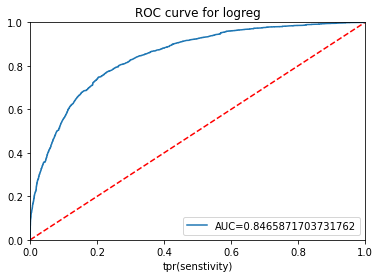

In [94]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr2,tpr2,label="AUC="+str(roc_auc2))
plt.legend(loc=4)
plt.show()

# model 3 using solver"newton-cg"

In [95]:
model3=LogisticRegression(solver="newton-cg",random_state=0)
model3 

LogisticRegression(random_state=0, solver='newton-cg')

In [96]:
model3.fit(x,y)

LogisticRegression(random_state=0, solver='newton-cg')

In [99]:
y_pred=model3.predict(x)

In [100]:
confusion_matrix(y,y_pred)

array([[ 7341,  4544],
       [ 2645, 21745]], dtype=int64)

In [101]:
model3.score(x,y)

0.8018194348725017

In [102]:
#classification report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.62      0.67     11885
           1       0.83      0.89      0.86     24390

    accuracy                           0.80     36275
   macro avg       0.78      0.75      0.76     36275
weighted avg       0.80      0.80      0.80     36275



In [103]:
# roc curve
y_pred_prob=model3.predict_proba(x)
fpr3,tpr3,threshold=roc_curve(data["booking_status"],y_pred_prob[:,1])
roc_auc3=auc(fpr3,tpr3)
print(roc_auc3)

0.8566829581631954


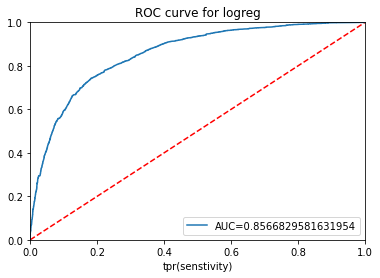

In [104]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr3,tpr3,label="AUC="+str(roc_auc3))
plt.legend(loc=4)
plt.show()

# mode4 using solver="sag"

In [105]:
model4=LogisticRegression(solver="sag",random_state=0)
model4 

LogisticRegression(random_state=0, solver='sag')

In [106]:
model4.fit(x,y)

LogisticRegression(random_state=0, solver='sag')

In [109]:
y_pred=model4.predict(x)

In [110]:
confusion_matrix(y,y_pred)

array([[ 5901,  5984],
       [ 2308, 22082]], dtype=int64)

In [111]:
model4.score(x,y)

0.7714128187456927

In [112]:
#classification report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.50      0.59     11885
           1       0.79      0.91      0.84     24390

    accuracy                           0.77     36275
   macro avg       0.75      0.70      0.71     36275
weighted avg       0.76      0.77      0.76     36275



In [113]:
# roc curve
y_pred_prob=model4.predict_proba(x)
fpr4,tpr4,threshold=roc_curve(data["booking_status"],y_pred_prob[:,1])
roc_auc4=auc(fpr4,tpr4)
print(roc_auc4)

0.8110906885257325


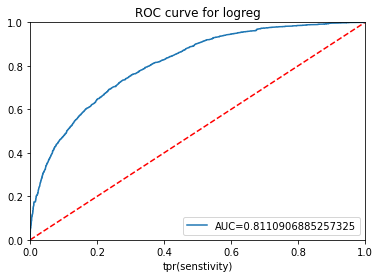

In [114]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr4,tpr4,label="AUC="+str(roc_auc4))
plt.legend(loc=4)
plt.show()

# mode5 using solver="saga"

In [115]:
model5=LogisticRegression(solver="saga",random_state=0)
model5

LogisticRegression(random_state=0, solver='saga')

In [116]:
model5.fit(x,y)

LogisticRegression(random_state=0, solver='saga')

In [119]:
y_pred=model5.predict(x)

In [120]:
confusion_matrix(y,y_pred)

array([[ 5739,  6146],
       [ 2342, 22048]], dtype=int64)

In [121]:
model5.score(x,y)

0.7660096485182633

In [122]:
#classification report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.48      0.57     11885
           1       0.78      0.90      0.84     24390

    accuracy                           0.77     36275
   macro avg       0.75      0.69      0.71     36275
weighted avg       0.76      0.77      0.75     36275



In [123]:
# roc curve
y_pred_prob=model4.predict_proba(x)
fpr5,tpr5,threshold=roc_curve(data["booking_status"],y_pred_prob[:,1])
roc_auc5=auc(fpr5,tpr5)
print(roc_auc5)

0.8110906885257325


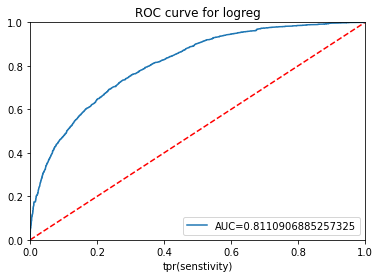

In [124]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr5,tpr5,label="AUC="+str(roc_auc5))
plt.legend(loc=4)
plt.show()

# logistic

In [125]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [126]:
print (x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(29020, 17) (7255, 17) (29020,) (7255,)


In [127]:
model6 = LogisticRegression()

In [128]:
model6.fit(x_train, y_train)

LogisticRegression()

In [131]:
y_pred = model6.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [133]:
confusion_matrix(y_test,y_pred)

array([[1431,  985],
       [ 522, 4317]], dtype=int64)

In [134]:
model6.score(x_train,y_train)

0.7906960716747071

In [135]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.59      0.66      2416
           1       0.81      0.89      0.85      4839

    accuracy                           0.79      7255
   macro avg       0.77      0.74      0.75      7255
weighted avg       0.79      0.79      0.79      7255



In [136]:
# roc curve
y_pred_prob=model4.predict_proba(x_test)
fpr6,tpr6,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc6=auc(fpr6,tpr6)
print(roc_auc6)

0.8167559573909009


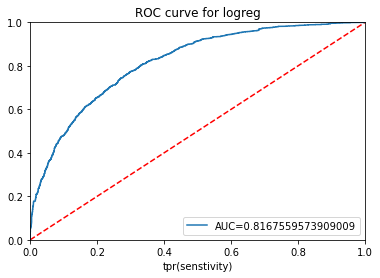

In [137]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr6,tpr6,label="AUC="+str(roc_auc6))
plt.legend(loc=4)
plt.show()